# 多层感知机

隐藏层

激活函数

* Relu

Relu函数是修正线性单元，它是一种非线性激活函数，在深度学习中广泛使用。它的数学表达式为：

f(x) = max(0, x)

Relu函数的特点是当输入小于0时，输出为0；当输入大于等于0时，输出为输入本身。这种特性使得Relu函数在训练神经网络时具有很好的效果，因为它可以避免梯度消失的问题。

In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, nd

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize()
    d2l.plt.plot(x_vals.asnumpy(), y_vals.asnumpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')
    d2l.plt.show()

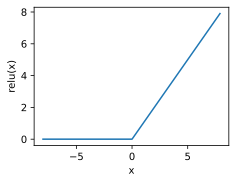

In [2]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.relu()

xyplot(x, y, 'relu')

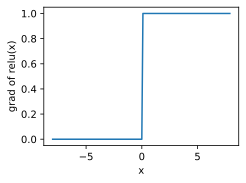

In [3]:
y.backward()
xyplot(x, x.grad, 'grad of relu')

* sigmoid

sigmoid函数是S型函数，它的数学表达式为：

f(x) = 1 / (1 + exp(-x))

sigmoid函数的特点是当输入小于0时，输出小于0.5；当输入大于0时，输出大于0.5。这种特性使得sigmoid函数在训练神经网络时具有很好的效果，因为它可以将输入映射到0到1之间的值，从而可以用于二分类问题。

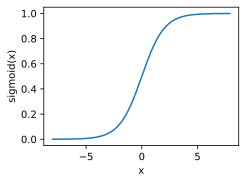

In [4]:
with autograd.record():
    y = x.sigmoid()

xyplot(x, y, 'sigmoid')

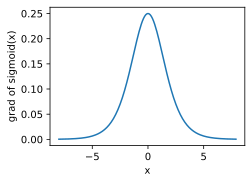

In [5]:
y.backward()
xyplot(x, x.grad, 'grad of sigmoid')

* tanh

tanh函数是双曲正切函数，它的数学表达式为：

f(x) = tanh(x) = 1-exp(-2x) / (1 + exp(-2x))

tanh函数的特点是当输入小于0时，输出小于0；当输入大于0时，输出大于0。这种特性使得tanh函数在训练神经网络时具有很好的效果，因为它可以将输入映射到-1到1之间的值，从而可以用于二分类问题。

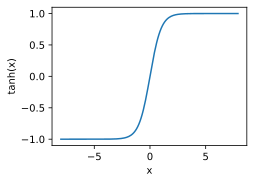

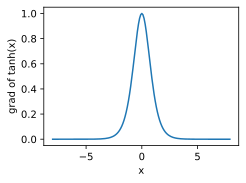

In [6]:
with autograd.record():
    y = x.tanh()

xyplot(x, y, 'tanh')
y.backward()
xyplot(x, x.grad, 'grad of tanh')

多层感知机

# 多层感知机的从零实现

In [7]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

获取数据

In [14]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [25]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

w1=nd.random.normal(scale=0.01,shape=(num_inputs, num_hiddens))
b1=nd.zeros(num_hiddens)
w2=nd.random.normal(scale=0.01,shape=(num_hiddens, num_outputs))
b2=nd.zeros(num_outputs)
params=[w1,b1,w2,b2]
for param in params:
    param.attach_grad()

激活函数

In [26]:
def relu(X):
    return nd.maximum(X, 0)

定义模型

In [27]:
def net(X):
    X= X.reshape((-1,num_inputs))
    H=relu(nd.dot(X,w1)+b1)
    return nd.dot(H,w2)+b2

定义损失函数

In [29]:
loss = gloss.SoftmaxCrossEntropyLoss()

训练模型

In [30]:
num_epochs = 5
lr = 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8045, train acc 0.696, test acc 0.832
epoch 2, loss 0.4878, train acc 0.820, test acc 0.849
epoch 3, loss 0.4337, train acc 0.840, test acc 0.848
epoch 4, loss 0.3962, train acc 0.853, test acc 0.865
epoch 5, loss 0.3703, train acc 0.862, test acc 0.866


* 改变神经网络中隐藏层神经元数量（num_hiddens）的值会对实验结果产生显著影响

增加 num_hiddens：提高模型容量，可能提升训练集表现，但可能导致过拟合和计算成本增加。

减少 num_hiddens：降低模型容量，可能缓解过拟合，但可能导致欠拟合。

最佳实践：通过实验调参，找到适合任务的 num_hiddens 值，并结合正则化技术优化模型性能。

# 多层感知机的简洁实现

In [31]:
import d2lzh as d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

In [32]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'), nn.Dense(10)) # 添加两个全连接层
net.initialize(init.Normal(sigma=0.01))

In [33]:
batch_size=256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer) 

epoch 1, loss 0.8239, train acc 0.695, test acc 0.823
epoch 2, loss 0.4958, train acc 0.816, test acc 0.840
epoch 3, loss 0.4327, train acc 0.840, test acc 0.858
epoch 4, loss 0.3936, train acc 0.853, test acc 0.851
epoch 5, loss 0.3760, train acc 0.861, test acc 0.867


各个参数的含义
* batch_size：每个小批量中样本的数量。
* train_iter：训练数据迭代器，用于提供小批量数据。
* test_iter：测试数据迭代器，用于提供小批量数据。
* loss：损失函数，用于计算预测值和真实值之间的差异。
* num_epochs：训练过程中迭代的次数。
* None：表示没有正则化参数。
* None：表示没有自定义的优化器。
* trainer：优化器，用于更新模型参数。

In [34]:
# 更换激活函数
net = nn.Sequential()
net.add(nn.Dense(256, activation='sigmoid'), nn.Dense(10)) # 添加两个全连接层
net.initialize(init.Normal(sigma=0.01))
batch_size=256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer) 

epoch 1, loss 1.0421, train acc 0.611, test acc 0.772
epoch 2, loss 0.5764, train acc 0.784, test acc 0.817
epoch 3, loss 0.5011, train acc 0.817, test acc 0.830
epoch 4, loss 0.4691, train acc 0.830, test acc 0.840
epoch 5, loss 0.4456, train acc 0.838, test acc 0.849


In [35]:
# 更换激活函数
net = nn.Sequential()
net.add(nn.Dense(256, activation='tanh'), nn.Dense(10)) # 添加两个全连接层
net.initialize(init.Normal(sigma=0.01))
batch_size=256 #每个小批量中样本的数量。
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer) 

epoch 1, loss 0.7742, train acc 0.715, test acc 0.818
epoch 2, loss 0.5212, train acc 0.809, test acc 0.841
epoch 3, loss 0.4634, train acc 0.830, test acc 0.850
epoch 4, loss 0.4376, train acc 0.839, test acc 0.853
epoch 5, loss 0.4087, train acc 0.852, test acc 0.857


In [37]:
# 定义网络结构
net = nn.Sequential()
net.add(
    nn.Dense(256, activation='tanh'),  # 第1个隐藏层
    nn.Dense(128, activation='tanh'),  # 第2个隐藏层
    nn.Dense(64, activation='tanh'),   # 第3个隐藏层
    nn.Dense(10)                       # 输出层
)

# 初始化网络参数
net.initialize(init.Normal(sigma=0.01))

# 加载数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 定义损失函数
loss = gloss.SoftmaxCrossEntropyLoss()

# 定义优化器
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})

# 训练模型
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 1.7010, train acc 0.306, test acc 0.664
epoch 2, loss 0.7866, train acc 0.688, test acc 0.785
epoch 3, loss 0.5887, train acc 0.778, test acc 0.824
epoch 4, loss 0.5094, train acc 0.812, test acc 0.839
epoch 5, loss 0.4616, train acc 0.831, test acc 0.844


In [39]:
# 定义网络结构
net = nn.Sequential()
net.add(
    nn.Dense(256, activation='tanh'),  # 第1个隐藏层
    nn.Dense(128, activation='tanh'),  # 第2个隐藏层
    nn.Dense(64, activation='tanh'),   # 第3个隐藏层
    nn.Dense(10)                       # 输出层
)

# 初始化网络参数
net.initialize(init.Normal(sigma=0.01))

# 加载数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 定义损失函数
loss = gloss.SoftmaxCrossEntropyLoss()

# 定义优化器
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})

# 训练模型
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 1.6477, train acc 0.327, test acc 0.648
epoch 2, loss 0.7594, train acc 0.700, test acc 0.770
epoch 3, loss 0.5827, train acc 0.780, test acc 0.817
epoch 4, loss 0.5091, train acc 0.816, test acc 0.841
epoch 5, loss 0.4873, train acc 0.823, test acc 0.834
epoch 6, loss 0.4340, train acc 0.842, test acc 0.849
epoch 7, loss 0.4117, train acc 0.850, test acc 0.855
epoch 8, loss 0.4007, train acc 0.853, test acc 0.863
epoch 9, loss 0.3851, train acc 0.858, test acc 0.849
epoch 10, loss 0.3710, train acc 0.863, test acc 0.867
